# Feature Engineering

1. Missing data
2. Feature Normalization
3. Categorical Encoding
4. Transformations
5. Discretization
6. Outliers
7. Optional: Date and Time

---
## 1. Missing data

In [ ]:
import pylab 
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/titanic.csv')

In [ ]:
data0 = titanic.copy()

In [ ]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data0.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
np.float(data0.shape[0])

891.0

In [ ]:
data0.dropna().shape[0]

183

In [ ]:
print(f'Percentage of data without missing values: {data0.dropna().shape[0]/ np.float(data0.shape[0])}')

Percentage of data without missing values: 0.2053872053872054


In [ ]:
data1 = titanic.copy()

In [ ]:
data1.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

**TODO:** `Age` is a continuous variable. First, we will check the distribution of `age` variable.

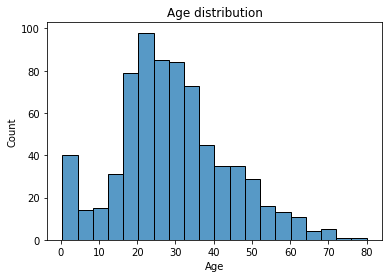

In [ ]:
sns.histplot(data1['Age']).set_title('Age distribution')
plt.show()

**TODO:** We can see that the `age` distribution is skewed. So, we will use the median imputation.

In [ ]:
data1 ['Age']=data1['Age'].fillna(data1['Age'].median())

In [ ]:
data1['Age'].fillna(data1['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
data1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

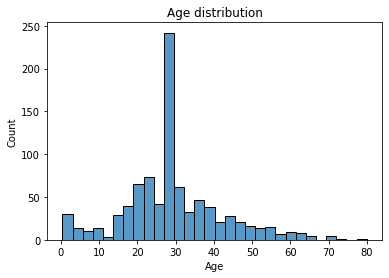

In [ ]:
sns.histplot(data1['Age']).set_title('Age distribution')
plt.show()

---
## 2. Feature Normalization

In [ ]:
data2 = titanic.copy()
median = data2['Age'].median()
data2['Age'] = data2['Age'].fillna(median)
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**TODO:** We are going to normalize the Age in two ways using MinMax Scaler and Standard Scaler

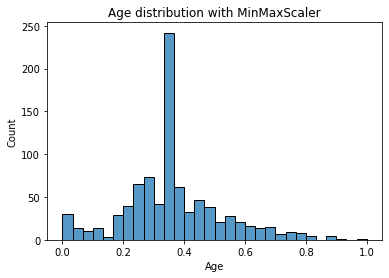

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm_scaler = MinMaxScaler(feature_range=(0, 1), clip=False)
data2['Age'] = mm_scaler.fit_transform(data2['Age'].values.reshape(-1, 1))
sns.histplot(data2['Age']).set_title('Age distribution with MinMaxScaler')
plt.show()

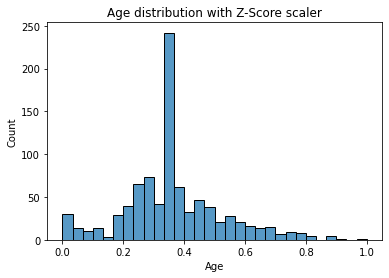

In [ ]:
std_scaler = StandardScaler()
data2['Age_std'] = std_scaler.fit_transform(data2['Age'].values.reshape(-1, 1))
sns.histplot(data2['Age']).set_title('Age distribution with Z-Score scaler')
plt.show()

In [ ]:
data2['Age_std'].describe()

count    8.910000e+02
mean     4.549609e-16
std      1.000562e+00
min     -2.224156e+00
25%     -5.657365e-01
50%     -1.046374e-01
75%      4.333115e-01
max      3.891554e+00
Name: Age_std, dtype: float64

---
## 3. Categorical Encoding

### One-Hot Encoding

In [ ]:
data3 = titanic.copy()

In [ ]:
data3['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [ ]:
data3_oh = pd.get_dummies(data3['Sex'])
data3_oh.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
data3 = data3.join(data3_oh)
data3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


We can see that we only need 1 of the 2 dummy variables to represent the original categorical variable `Sex`. Any of the 2 will do the job, and it doesn't matter which one we select, since they are equivalent. Therefore, to encode a categorical variable with 2 labels, we need only 1 dummy variable.

To extend this concept, to encode categorical variable with k labels, we need k-1 dummy variables. We can achieve this task as follows:

**TODO:** Obtaining k-1 labels on __Sex__ and __Embarked__ features

In [ ]:
data3_dummie = pd.get_dummies(data3['Sex'],drop_first=True,prefix='Sex')
data3 = data3.join(data3_dummie)
data3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,1


In [ ]:
data3_dummie2 = pd.get_dummies(data3['Embarked'],drop_first=True,prefix='Embarked')
data3 = data3.join(data3_dummie2)
data3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,1,0,1


**TODO:** Investigate Scikt-Learn API [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#create a new copay of dataset
data4 = titanic.copy()

#declare one hot encoder class
ohe = OneHotEncoder(dtype=np.int64,drop='first')
#fit data
sex_ohe = ohe.fit_transform(data4['Sex'].values.reshape(-1,1))

#print(sex_ohe)# - returns a square matrix
#print(sex_ohe.toarray())# - returns an array with n columns
#print(sex_ohe.shape)
#print(ohe.categories_)# - returns values columns 

#create new colum in dataset
data4[ohe.categories_[0][1]] = sex_ohe.toarray()

data4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:
#create a new copay of dataset
data4 = titanic.copy()

#declare one hot encoder class
ohe = OneHotEncoder(dtype=np.int64,drop='first')
#fit data
sex_ohe = ohe.fit_transform(data4['Sex'].values.reshape(-1,1))

#print(sex_ohe)# - returns a square matrix
#print(sex_ohe.toarray())# - returns an array with n columns
#print(sex_ohe.shape)
print(ohe.categories_)# - returns values columns 

#create new colum in dataset
data4[ohe.categories_[0][0]] = sex_ohe.toarray()

data4

[array(['female', 'male'], dtype=object)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:

#create a new copy of dataset
data4 = titanic.copy()

#declare one hot encoder class
ohe = OneHotEncoder(dtype=np.int64,drop='first')
#fit data
embarked_ohe = ohe.fit_transform(data4['Embarked'].values.reshape(-1,1))

#print(embarked_ohe) #- returns a square matrix
#print(embarked_ohe.toarray()) #- returns an array with n columns
#print(ohe.categories_) #- returns values columns 

#create new colum in dataset
data4[ohe.categories_[0][1:]] = embarked_ohe.toarray()
data4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S,NaN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,0


In [ ]:
#create a new copy of dataset
data4 = titanic.copy()

#declare one hot encoder class
ohe = OneHotEncoder(dtype=np.int64,drop='first',sparse=False)
#fit data
embarked_ohe = ohe.fit_transform(data4['Embarked'].values.reshape(-1,1))

#print(embarked_ohe) #- returns a square matrix
#print(embarked_ohe.toarray()) #- returns an array with n columns
#print(ohe.categories_) #- returns values columns 

#create new colum in dataset
data4[ohe.categories_[0][1:]] = embarked_ohe
data4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S,NaN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,0


---
## 4 Transformations

In [ ]:
data4 = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/titanic.csv', usecols=['Age', 'Fare', 'Survived'])
data4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
data4['Age'] = data4['Age'].fillna(data4.Age.median())
data4.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

### Example: Logarithmic transformation

In [ ]:
#log solo es log natural 

data4['Age_log'] = np.log(data4.Age)

data4

,Survived,Age,Fare,Age_log
0,0,22.0,7.2500,3.091042
1,1,38.0,71.2833,3.637586
2,1,26.0,7.9250,3.258097
3,1,35.0,53.1000,3.555348
4,0,35.0,8.0500,3.555348
...,...,...,...,...
886,0,27.0,13.0000,3.295837
887,1,19.0,30.0000,2.944439
888,0,28.0,23.4500,3.332205
889,1,26.0,30.0000,3.258097


**TODO:** Convert Age to months

In [ ]:
#cálculo fácil
data4['Age_months_easy']= data4['Age'].astype(int)*12
data4

,Survived,Age,Fare,Age_log,Age_months_easy
0,0,22.0,7.2500,3.091042,264
1,1,38.0,71.2833,3.637586,456
2,1,26.0,7.9250,3.258097,312
3,1,35.0,53.1000,3.555348,420
4,0,35.0,8.0500,3.555348,420
...,...,...,...,...,...
886,0,27.0,13.0000,3.295837,324
887,1,19.0,30.0000,2.944439,228
888,0,28.0,23.4500,3.332205,336
889,1,26.0,30.0000,3.258097,312


In [ ]:
from dateutil import relativedelta
from datetime import datetime, date

current_year = date.today().year
data4['Birthdate_Year'] = current_year - data4['Age']
data4['Birthdate_Year'] = pd.to_datetime(data4['Birthdate_Year'],format="%Y")

def get_age_in_months (birthday):
  """
  This function will return the age in format:
  {months} months
  """
  #getting today's date
  today = date.today()
  #relativedelta function to bring two dates difference
  age_years= relativedelta.relativedelta(today,birthday).years
  age_months = relativedelta.relativedelta(today,birthday).months
  return f'{age_years*12+age_months}'

In [ ]:
from dateutil import relativedelta
from datetime import datetime, date

data4['Age_months_hard'] = data4['Birthdate_Year'].apply(get_age_in_months)

data4

,Survived,Age,Fare,Age_log,Age_months_easy,Birthdate_Year,Age_months_hard
0,0,22.0,7.2500,3.091042,264,2000-01-01,268
1,1,38.0,71.2833,3.637586,456,1984-01-01,460
2,1,26.0,7.9250,3.258097,312,1996-01-01,316
3,1,35.0,53.1000,3.555348,420,1987-01-01,424
4,0,35.0,8.0500,3.555348,420,1987-01-01,424
...,...,...,...,...,...,...,...
886,0,27.0,13.0000,3.295837,324,1995-01-01,328
887,1,19.0,30.0000,2.944439,228,2003-01-01,232
888,0,28.0,23.4500,3.332205,336,1994-01-01,340
889,1,26.0,30.0000,3.258097,312,1996-01-01,316


---
## 5. Discretization

**TODO:** Apply binning to __Age__ and plot Age count per bin

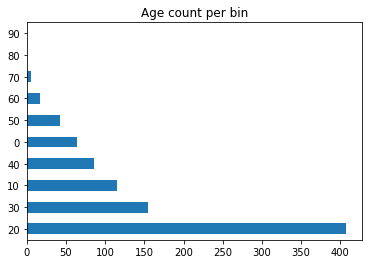

In [ ]:
bins = [0,10,20, 30, 40, 50, 60,70,80,90,100]
labels = ['0','10','20', '30', '40', '50', '60','70','80','90']

age_bins = pd.cut(data4['Age'],bins=bins,labels=labels)

age_bins.value_counts().plot(kind='barh').set_title('Age count per bin')
plt.show()

---
## 6. Outliers

**TODO:** Load the numerical variables of the Titanic Dataset

In [ ]:
data5= titanic.copy()
numerical = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data5 = data5.select_dtypes(include=numerical)
data5

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [ ]:
data6= titanic.copy()
data6 = data6.select_dtypes(include='number')
data6

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


**TODO:** We can see that `Age` and `Fare` are continuous variables. So, you'll need to limit outliers on those variables.

**TODO:** Plot histograms on __Age__ and __Fare__

Text(0.5, 1.0, 'Fare distribution')

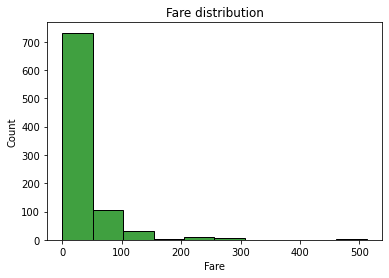

In [ ]:
sns.histplot(data5['Fare'], bins=10, color='g').set_title('Fare distribution')

**TODO:** __Age__ is quite Gaussian and __Fare__ is skewed, so you will use the Gaussian assumption for __Age__, and the interquantile range for __Fare__.

### Find outliers

Text(0.5, 1.0, 'Age w/o outliers')

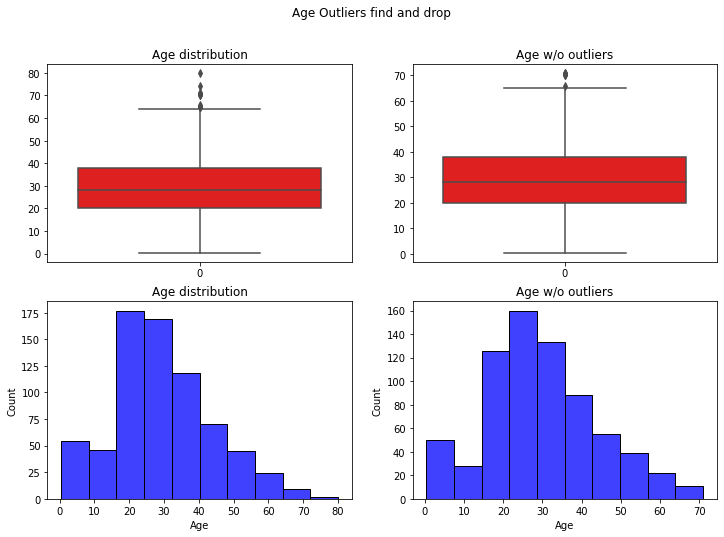

In [ ]:
age_mean = round(data5['Age'].mean(),2)
age_std = round(data5['Age'].std(),2)

cut_off = age_std*3

age_upper = age_mean + cut_off
age_lower = age_mean - cut_off

age_without_outliers = data5['Age'][(data5['Age'] < age_upper) & (data5['Age'] > age_lower)]
age_outliers1 = data5['Age'][(data5['Age'] < age_lower) | (data5['Age'] > age_upper)]
age_outliers2= [x for x in data5['Age'] if x < age_lower or x > age_upper]

figure, axes = plt.subplots(2, 2, sharex=False, figsize=(12,8))
figure.suptitle('Age Outliers find and drop')
sns.boxplot(ax=axes[0,0],data=data5['Age'],color='r').set_title('Age distribution')
sns.boxplot(ax=axes[0,1],data=age_without_outliers,color='r').set_title('Age w/o outliers')
sns.histplot(ax=axes[1,0],data=data5['Age'],bins=10,color='b').set_title('Age distribution')
sns.histplot(ax=axes[1,1],data=age_without_outliers,bins=10,color='b').set_title('Age w/o outliers')

In [ ]:
age_outliers1

630    80.0
851    74.0
Name: Age, dtype: float64

Text(0.5, 1.0, 'Fare w/o outliers')

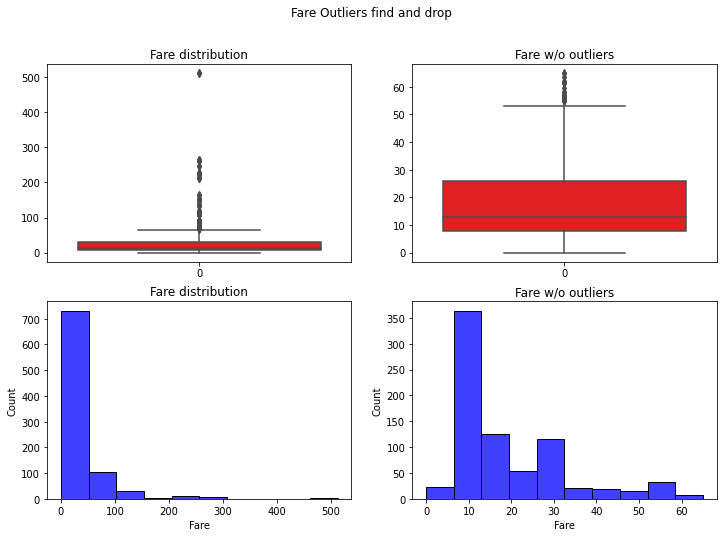

In [ ]:
Q1=data5['Fare'].quantile(0.25)
Q3=data5['Fare'].quantile(0.75)
IQR= Q3-Q1
fare_outliers = data5['Fare'][(data5['Fare']<(Q1-1.5*IQR)) | (data5['Fare']>(Q3+1.5*IQR))]
fare_without_outliers = data5['Fare'][(data5['Fare']>(Q1-1.5*IQR)) & (data5['Fare']<(Q3+1.5*IQR))]

figure, axes = plt.subplots(2, 2, sharex=False, figsize=(12,8))
figure.suptitle('Fare Outliers find and drop')
sns.boxplot(ax=axes[0,0],data=data5['Fare'],color='r').set_title('Fare distribution')
sns.boxplot(ax=axes[0,1],data=fare_without_outliers,color='r').set_title('Fare w/o outliers')
sns.histplot(ax=axes[1,0],data=data5['Fare'],bins=10,color='b').set_title('Fare distribution')
sns.histplot(ax=axes[1,1],data=fare_without_outliers,bins=10,color='b').set_title('Fare w/o outliers')


---
## 7. Optional: Date and Time

In some machine learning problems, temporary features appear, such as dates, times, etc. That type of data must be treated in a particular way.

**NOTE:** There is an area of machine learning where time data becomes critical, time series.

In [ ]:
data7 = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/stock_prices.csv')
data7.head()

,Date,Close Price,High Price,Low Price,Open Price,Volume
0,2021-12-10 05AM,48246.57,48359.35,48051.08,48170.66,827.39761
1,2021-12-10 06AM,47847.59,48430.00,47810.81,48249.78,1296.18883
2,2021-12-10 07AM,47694.62,48037.48,47550.00,47847.59,2299.85298
3,2021-12-10 08AM,48090.35,48169.06,47587.39,47694.62,1371.25447
4,2021-12-10 09AM,48366.37,48495.00,47869.80,48090.35,1232.30238


**TODO:** Parse the dates, currently coded as strings, into datetime.

**TIP:** Investigate pandas [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and take care of date format!

In [ ]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         337 non-null    object 
 1   Close Price  337 non-null    float64
 2   High Price   337 non-null    float64
 3   Low Price    337 non-null    float64
 4   Open Price   337 non-null    float64
 5   Volume       337 non-null    float64
dtypes: float64(5), object(1)
memory usage: 15.9+ KB


**TODO:** Extract Month from Date

In [ ]:
month = data7['Date'].str.split("-")
print(type(month[0][1]))
print(month)
print(month[0][1])
data7['Date'] = pd.to_datetime(month)

<class 'str'>
0      [2021, 12, 10 05AM]
1      [2021, 12, 10 06AM]
2      [2021, 12, 10 07AM]
3      [2021, 12, 10 08AM]
4      [2021, 12, 10 09AM]
              ...         
332    [2021, 12, 24 01AM]
333    [2021, 12, 24 02AM]
334    [2021, 12, 24 03AM]
335    [2021, 12, 24 04AM]
336    [2021, 12, 24 05AM]
Name: Date, Length: 337, dtype: object
12


TypeError: ignored

**TODO:** Convert Day to numeric from 1-31

**TODO:** Convert Day of the week to numeric from 0 to 6

**TODO:** Convert Day of the week to name

**TODO:** Was on Weekend? Generate a binary feature that indicates if the date corresponds to a weekend day.

**TODO:** Extract year 

**TODO:** Extract hour